In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from mpl_toolkits.mplot3d import Axes3D

tf.random.set_seed(777)

## 데이터 그래프화

In [3]:

x_train = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_train = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]
x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]
x3 = [x[2] for x in x_train]

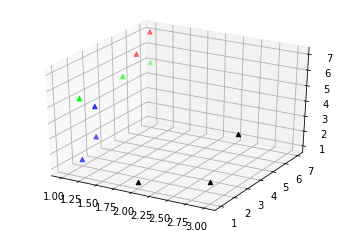

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 1*1 grid, first subplot
ax.scatter(x1, x2, x3, c=y_train, marker='^')

ax.scatter(x_test[0][0], x_test[0][1], x_test[0][2], c="black", marker='^')
ax.scatter(x_test[1][0], x_test[1][1], x_test[1][2], c="black", marker='^')
ax.scatter(x_test[2][0], x_test[2][1], x_test[2][2], c="black", marker='^')
plt.show()

 Tensorflow data API를 통해 학습시킬 값들을 담는다.
 Batch size는 한번에 학습시킬 size
 features, labels 는 실제 학습에 쓰일 데이터

In [7]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [8]:
W = tf.Variable(tf.random.normal((3, 3)))
b = tf.Variable(tf.random.normal((3, )))

In [9]:
def softmax_fn(features):
    hypothesis = tf.nn.softmax(tf.matmul(features, W) +b)
    return hypothesis

In [11]:
# Cost 함수
def loss_fn(hypothesis):
    cost = tf.reduce_mean(-tf.reduce_sum(labels * tf.math.log(hypothesis), axis=1))
    return cost

## Learning Rate 값 조정 위한 Learning Decay 설정
+ stater_learning_rate : 최초 learning rate
+ global_step : 현재 학습횟수
+ 1000 : 곱할 횟수 정의 (1000번마다)
+ 0.96 : 기존 learning에 곱할 값
+ 적용유무 decayed_learning_rate =learning_rate * decay_rate ^ (global_step / decay_steps)

In [15]:
is_decay = True
starter_learning_rate = 0.1

if(is_decay):
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = starter_learning_rate,
                                                                  decay_steps=1000,
                                                                  decay_rate=0.96,
                                                                  staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)
    
def grad(features):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(softmax_fn(features))
    return tape.gradient(loss_value, [W, b])

In [22]:
def accuracy_fn(hypothesis, labels):
    prediction = tf.argmax(hypothesis, 1)
    is_correct = tf.equal(prediction, tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    return accuracy

In [23]:
epochs = 1001

for step in range(epochs):
    for features, labels in iter(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads = grad(features)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
        if step%100 == 0:
            print("Iter : {}, Loss : {:.4f}".format(step, loss_fn(softmax_fn(features))))


Iter : 0, Loss : 0.2740
Iter : 100, Loss : 0.2682
Iter : 200, Loss : 0.2627
Iter : 300, Loss : 0.2575
Iter : 400, Loss : 0.2525
Iter : 500, Loss : 0.2478
Iter : 600, Loss : 0.2432
Iter : 700, Loss : 0.2389
Iter : 800, Loss : 0.2347
Iter : 900, Loss : 0.2307
Iter : 1000, Loss : 0.2269


In [24]:
x_test = tf.cast(x_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)
test_acc = accuracy_fn(softmax_fn(x_test), y_test)
print("Testset Accuracy : {:.4f}".format(test_acc))

Testset Accuracy : 1.0000


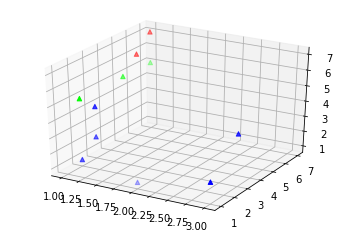

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 1*1 grid, first subplot
ax.scatter(x1, x2, x3, c=y_train, marker='^')

ax.scatter([x[0] for x in x_test], [x[1] for x in x_test], [x[2] for x in x_test], c=y_test, marker='^')

plt.show()